In [1]:
%matplotlib notebook
import numpy as np
import pickle
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
from scipy.optimize import minimize
import pandas as pd

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
outdict = pickle.load(open("/Users/roodman/Astrophysics/Zemax/Decam/ZernikeMaps/decam-2012/Zernike_coefs_map-nominal-wavelength.pickle",'rb'),encoding='iso-8859-1')

In [3]:
df = pd.DataFrame(outdict)
dft = df.T
dft.columns = ['name','wave','thetax','thetay','x','y','zarr']

In [4]:
zdict = {}
for i in range(37):
    zdict[i] = "z%d" % (i+1)

In [5]:
dftt = dft.join(dft.zarr.apply(pd.Series).rename(columns=zdict))       

In [6]:
dftt

name  wave     thetax     thetay        x            y  \
0     b'Cen'   0.4          0          0        0            0   
1      b'S1'   0.4  0.0825096  -0.935333  16.9185     -191.806   
2      b'S2'   0.4  0.0825943  -0.624195  16.9178     -127.859   
3      b'S3'   0.4  0.0826451   -0.31229  16.9117     -63.9046   
4      b'S4'   0.4   0.082662          0  16.9092 -1.27072e-15   
...      ...   ...        ...        ...      ...          ...   
2835  b'FS4'  1.07      1.072 -0.0779001  219.921     -15.9794   
2836  b'FN1'  1.07  -0.742332   0.701264  -152.27      143.845   
2837  b'FN2'  1.07  -0.907146   0.545339 -186.093      111.865   
2838  b'FN3'  1.07     -1.072  0.0779001 -219.921      15.9794   
2839  b'FN4'  1.07     -1.072 -0.0779001 -219.921     -15.9794   

                                                   zarr        z1        z2  \
0     [0.37775009, 0.0, 0.0, 0.32199878, 0.0, -1e-08...  0.377750  0.000000   
1     [2.11000679, 0.24628494, -2.79221063, 0.591203...  2.110007  0.246285   
2     [1.18464033, 0.3376046, -2.55151059, 0.4301333...  1.184640  0.337605   
3     [0.71534576, 0.37559555, -1.41926851, 0.414208...  0.715346  0.375596   
4     [0.40464399, 0.39479448, 0.0, 0.33056639, 0.0,...  0.404644  0.394794   
...                                                 ...       ...       ...   
2835  [0.24849861, -0.61659739, 0.04479202, 0.095565...  0.248499 -0.616597   
2836  [0.213439, 0.22546794, -0.21295341, 0.1005925,...  0.213439  0.225468   
2837  [0.23955688, 0.4408185, -0.26494449, 0.0975695...  0.239557  0.440819   
2838  [0.24849861, 0.61659739, -0.04479202, 0.095565...  0.248499  0.616597   
2839  [0.24849861, 0.61659739, 0.04479202, 0.0955658...  0.248499  0.616597   

            z3  ...           z28       z29       z30       z31       z32  \
0     0.000000  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000   
1    -2.792211  ... -4.712900e-04 -0.013516  0.001195  0.004961 -0.001323   
2    -2.551511  ... -4.085000e-05 -0.004256  0.000561  0.001181 -0.000487   
3    -1.419269  ... -1.900000e-07 -0.000943  0.000247  0.000109 -0.000107   
4     0.000000  ...  1.000000e-08  0.000000  0.000152  0.000000  0.000003   
...        ...  ...           ...       ...       ...       ...       ...   
2835  0.044792  ...  3.972200e-04 -0.000636  0.009144 -0.000711  0.003252   
2836 -0.212953  ... -5.555000e-05  0.005173 -0.005555  0.002038  0.001753   
2837 -0.264944  ... -3.974000e-04  0.004340 -0.007392  0.003082  0.000166   
2838 -0.044792  ...  3.972200e-04  0.000636 -0.009144  0.000711 -0.003252   
2839  0.044792  ...  3.972200e-04 -0.000636 -0.009144 -0.000711 -0.003252   

               z33           z34           z35           z36       z37  
0     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -0.000358  
1    -3.027000e-04  1.475500e-04  9.780000e-06 -6.240000e-06  0.002086  
2    -2.889000e-05  2.436000e-05  3.000000e-07 -3.500000e-07  0.000529  
3    -1.700000e-07  1.160000e-06  0.000000e+00  0.000000e+00 -0.000154  
4     0.000000e+00  5.000000e-08  0.000000e+00  0.000000e+00 -0.000349  
...            ...           ...           ...           ...       ...  
2835 -1.046600e-04  2.798100e-04 -6.790000e-06  1.282000e-05  0.001212  
2836 -1.295500e-04  1.786300e-04 -6.750000e-06 -4.370000e-06  0.001160  
2837  1.166700e-04  2.433500e-04 -6.620000e-06  9.820000e-06  0.001250  
2838  1.046600e-04 -2.798100e-04  6.790000e-06 -1.282000e-05  0.001212  
2839 -1.046600e-04 -2.798100e-04 -6.790000e-06 -1.282000e-05  0.001212  

[2840 rows x 44 columns]

In [7]:
np.unique(dftt.wave)

array([0.4, 0.42, 0.44, 0.46, 0.48, 0.51, 0.53, 0.55, 0.56, 0.58, 0.6,
       0.62, 0.64, 0.66, 0.675, 0.69, 0.7, 0.715, 0.73, 0.745, 0.76,
       0.775, 0.8, 0.82, 0.83, 0.85, 0.88, 0.9, 0.93, 0.95, 0.97, 0.98,
       0.99, 1.01, 1.017, 1.024, 1.03, 1.05, 1.07], dtype=object)

In [8]:
fn1 = (dftt.name == b'FN1')

In [9]:
radial_terms = [4,11,22,37]
loworder_terms = [5,6,7,8]
triquad_terms = [9,10,14,15]
highorder_terms = [12,13,16,17,18,19,20,21]

<IPython.core.display.Javascript object>


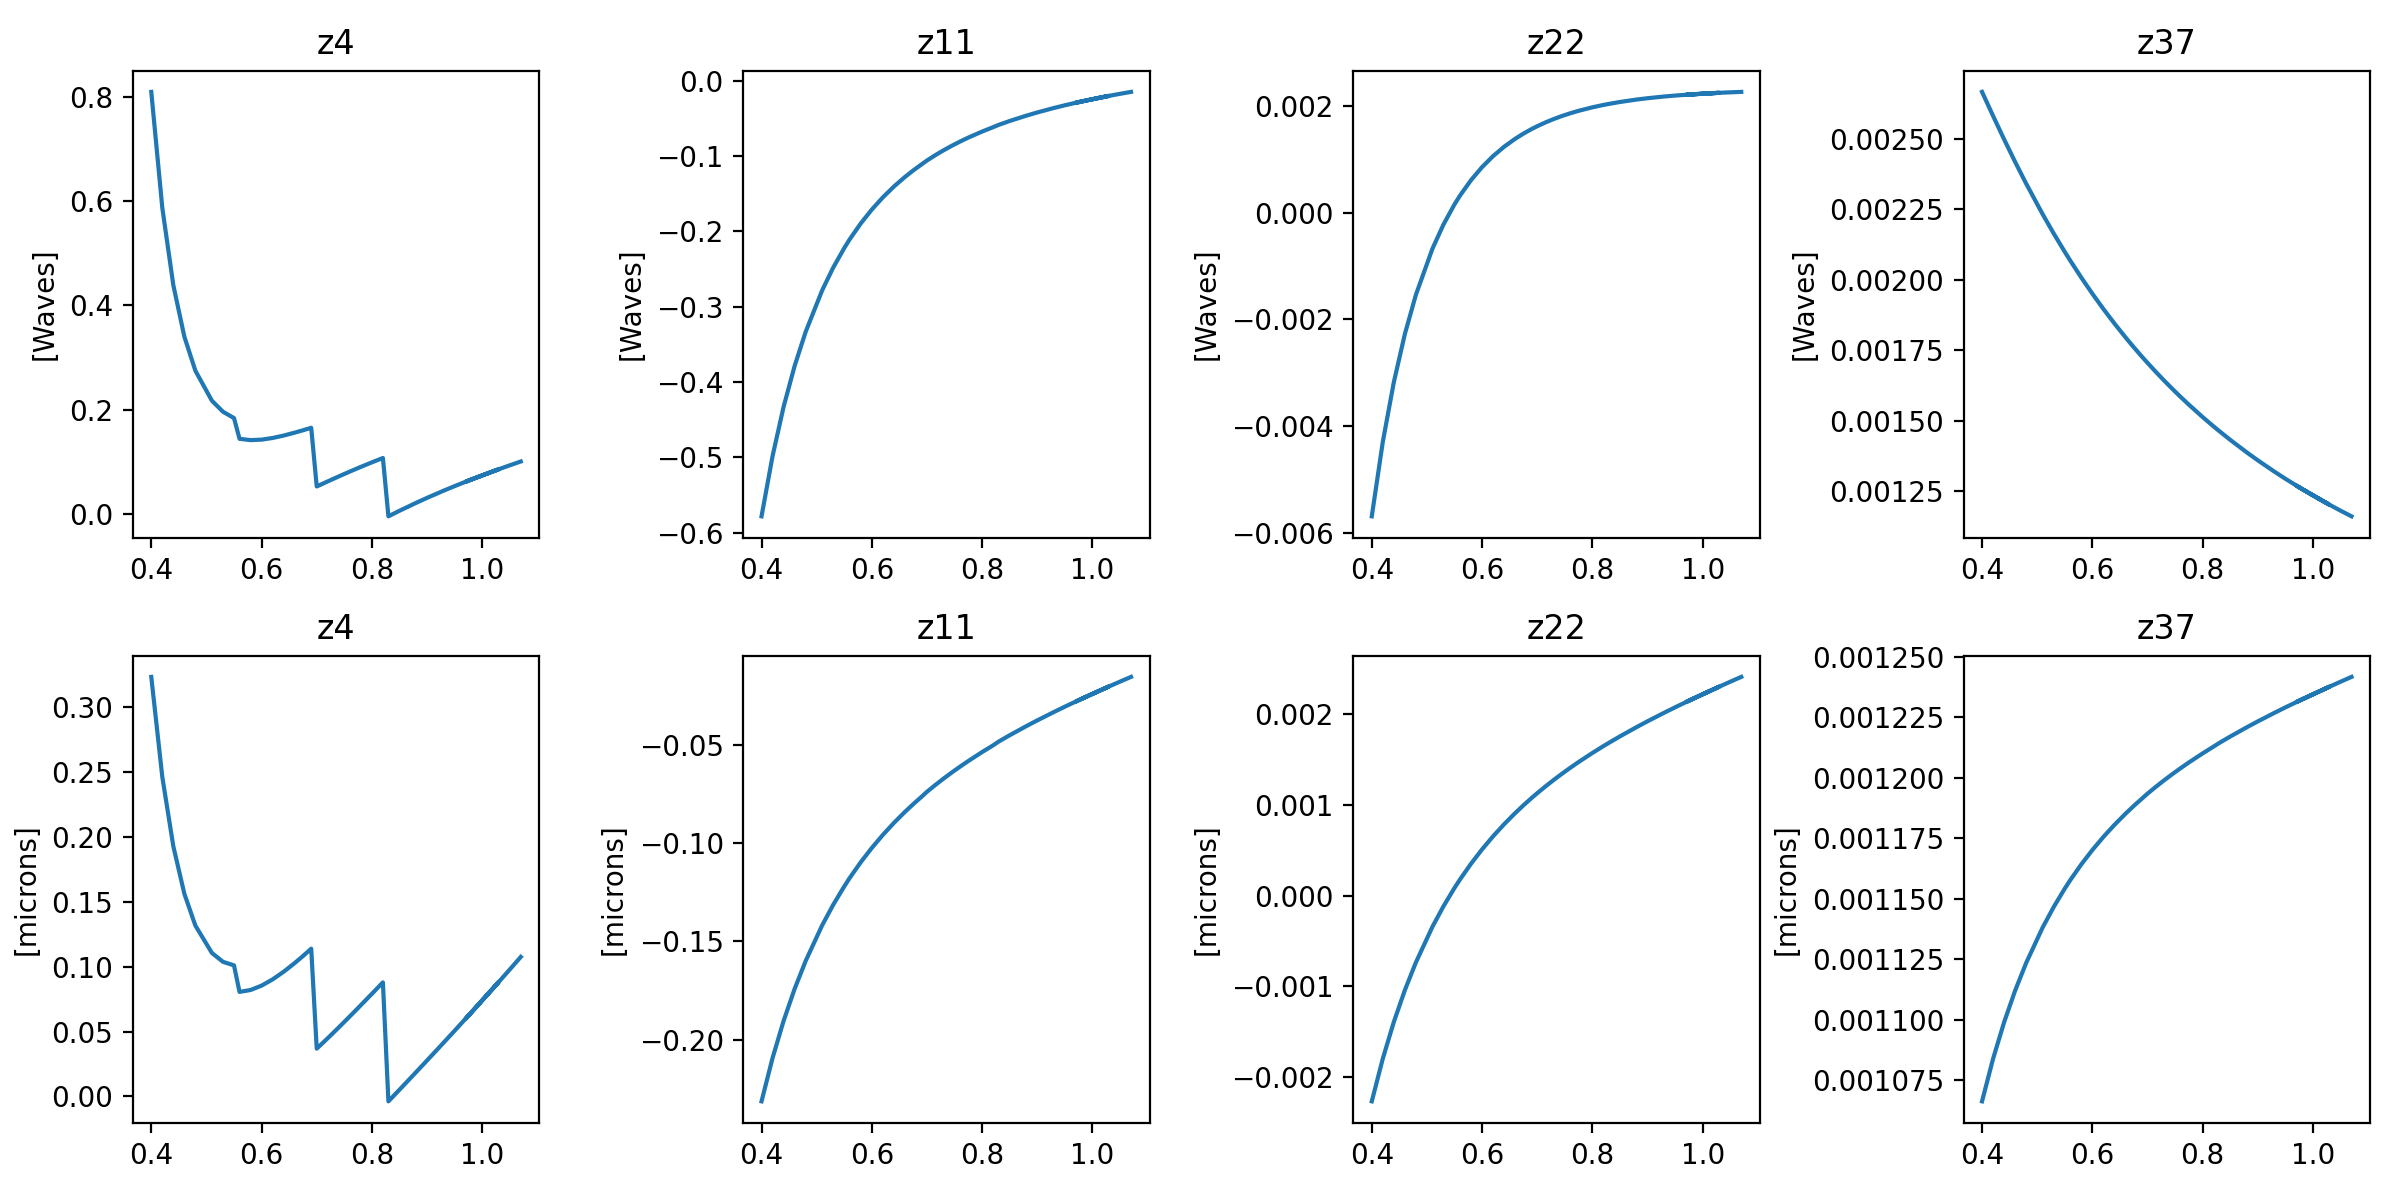

In [10]:
f,ax = plt.subplots(2,4,figsize=(12,6))
axf = ax.flatten()
ii = 0
for i in radial_terms:
    
    name = "z%d" % (i)
    p = axf[ii].plot(dftt[fn1].wave,dftt[fn1][name])
    axf[ii].set_title(name)
    axf[ii].set_ylabel("[Waves]")
    ii = ii+1
    
for i in radial_terms:
    
    name = "z%d" % (i)
    p = axf[ii].plot(dftt[fn1].wave,dftt[fn1][name]*dftt[fn1].wave)
    axf[ii].set_title(name)
    axf[ii].set_ylabel("[microns]")
    ii = ii+1
    
plt.tight_layout()

<IPython.core.display.Javascript object>


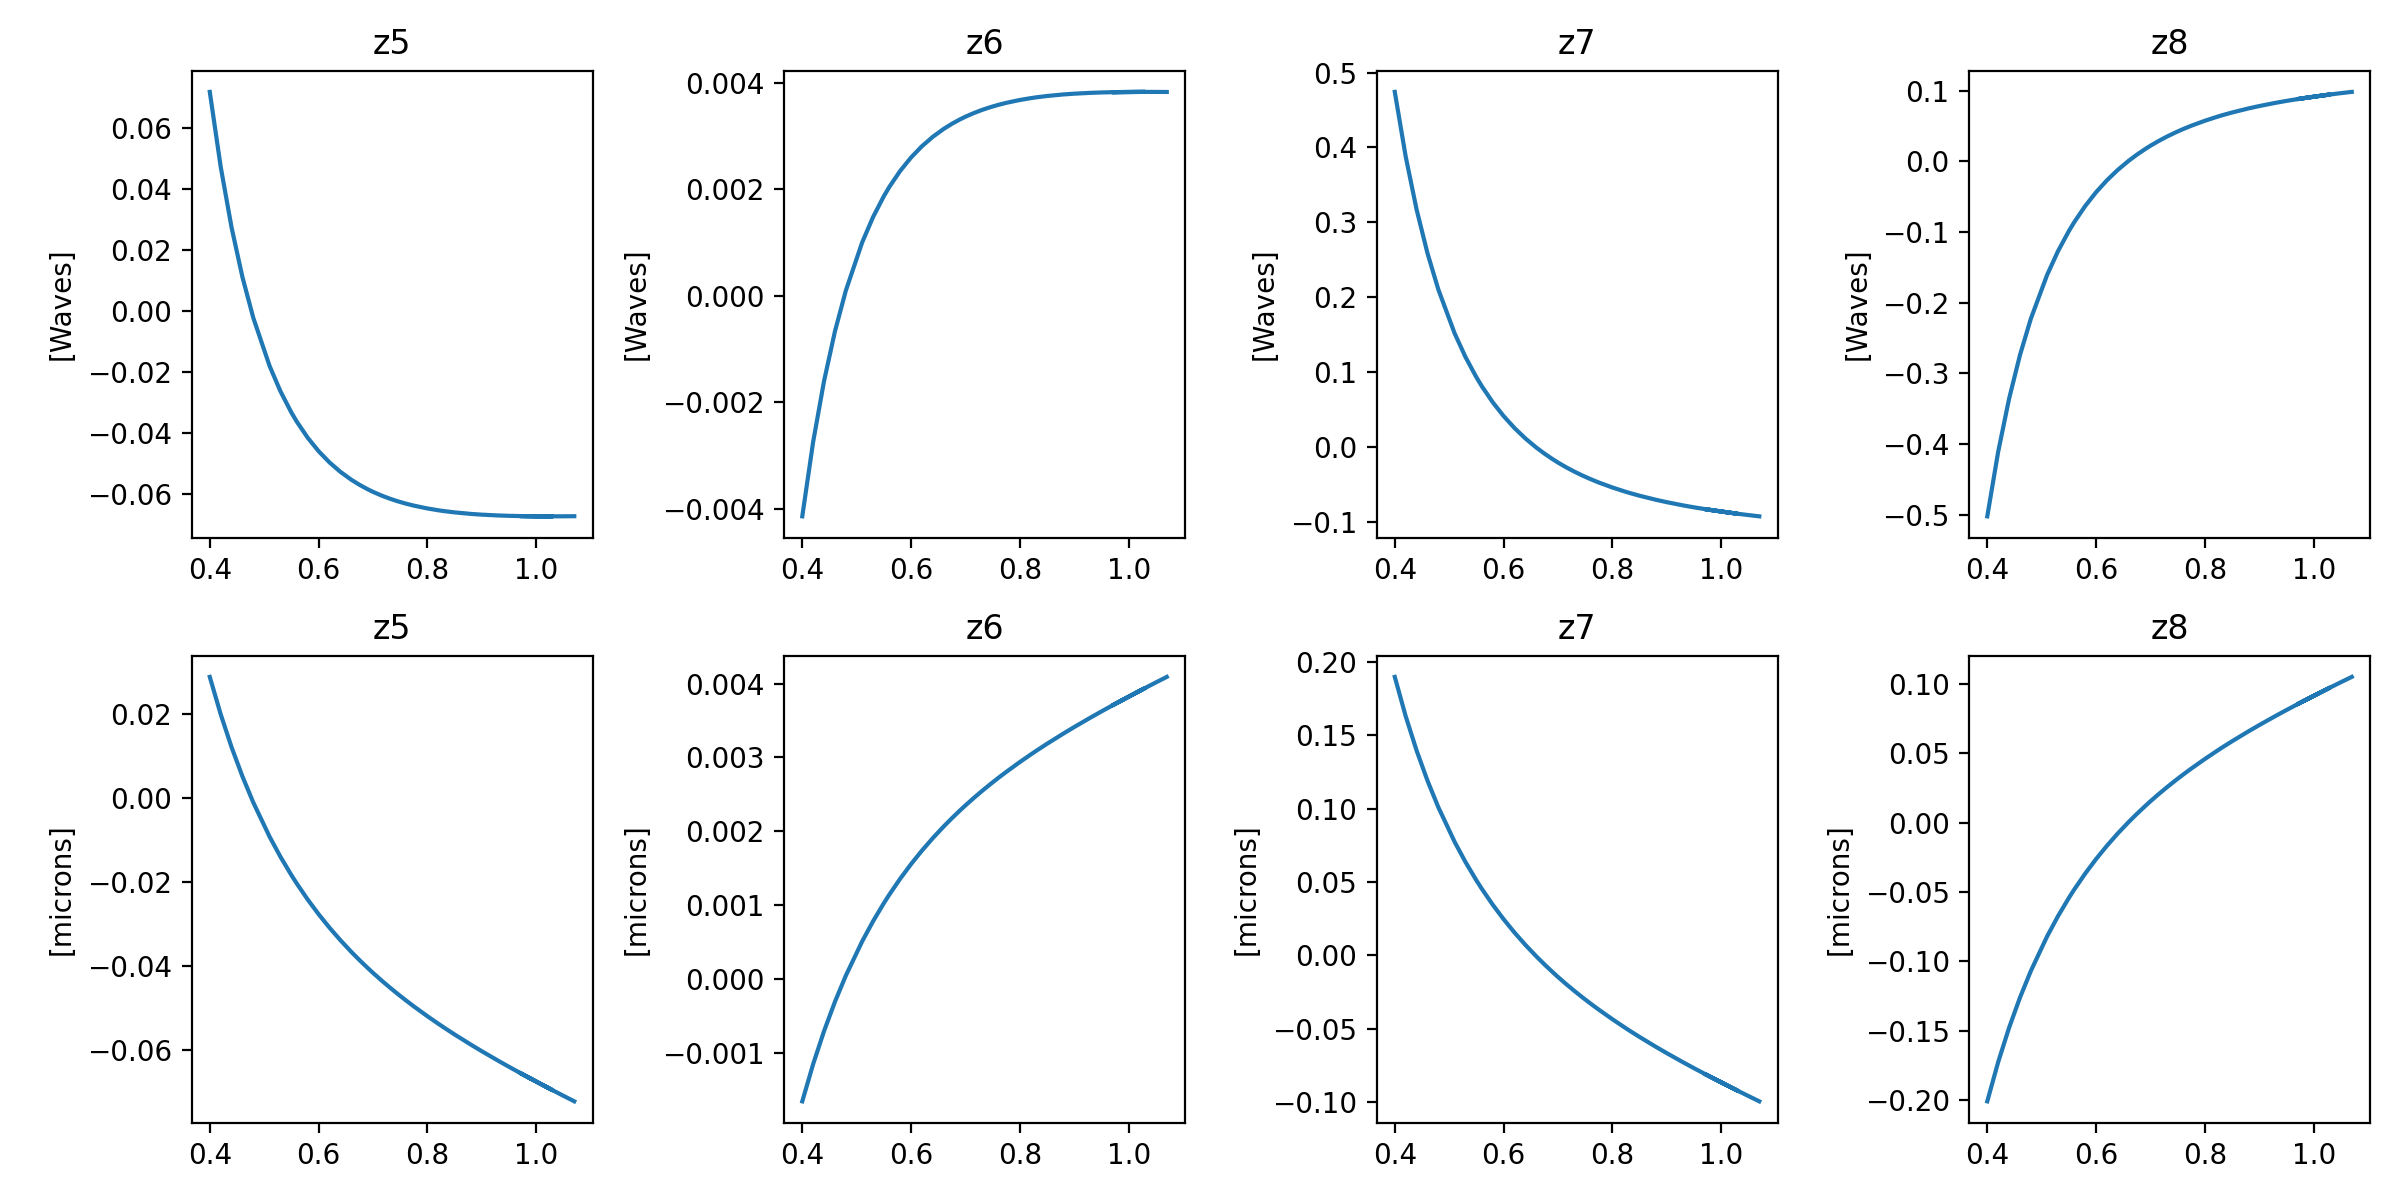

In [11]:
f,ax = plt.subplots(2,4,figsize=(12,6))
axf = ax.flatten()
ii = 0
for i in loworder_terms:
    
    name = "z%d" % (i)
    p = axf[ii].plot(dftt[fn1].wave,dftt[fn1][name])
    axf[ii].set_title(name)
    axf[ii].set_ylabel("[Waves]")
    ii = ii+1
    
for i in loworder_terms:
    
    name = "z%d" % (i)
    p = axf[ii].plot(dftt[fn1].wave,dftt[fn1][name]*dftt[fn1].wave)
    axf[ii].set_title(name)
    axf[ii].set_ylabel("[microns]")
    ii = ii+1
    
plt.tight_layout()

<IPython.core.display.Javascript object>


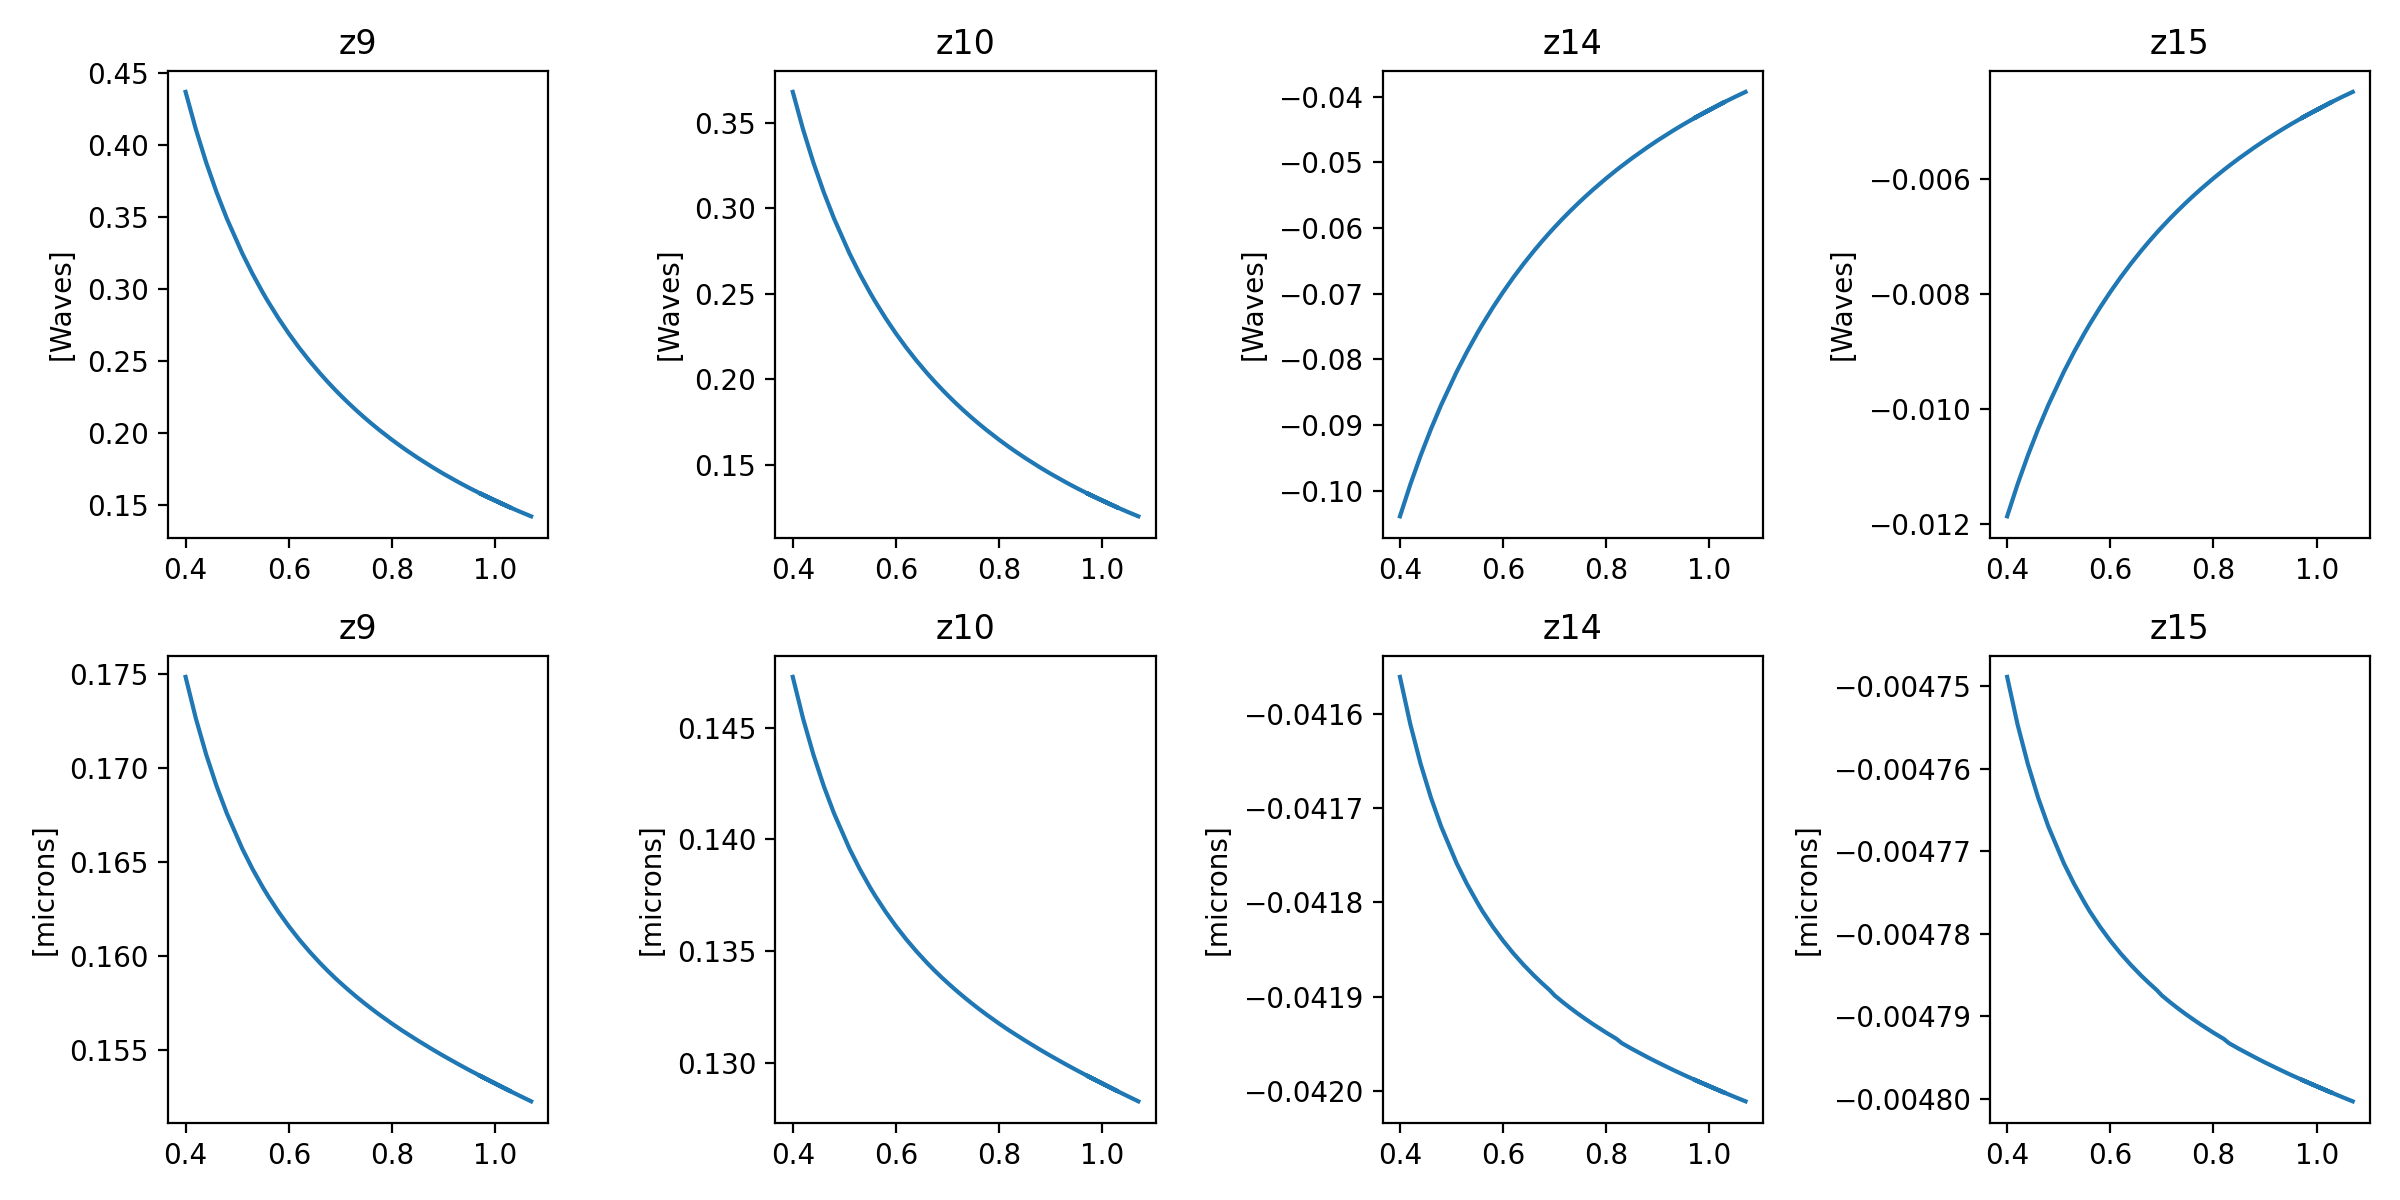

In [12]:
f,ax = plt.subplots(2,4,figsize=(12,6))
axf = ax.flatten()
ii = 0
for i in triquad_terms:
    
    name = "z%d" % (i)
    p = axf[ii].plot(dftt[fn1].wave,dftt[fn1][name])
    axf[ii].set_title(name)
    axf[ii].set_ylabel("[Waves]")
    ii = ii+1
    
for i in triquad_terms:
    
    name = "z%d" % (i)
    p = axf[ii].plot(dftt[fn1].wave,dftt[fn1][name]*dftt[fn1].wave)
    axf[ii].set_title(name)
    axf[ii].set_ylabel("[microns]")
    ii = ii+1
    
plt.tight_layout()

<IPython.core.display.Javascript object>


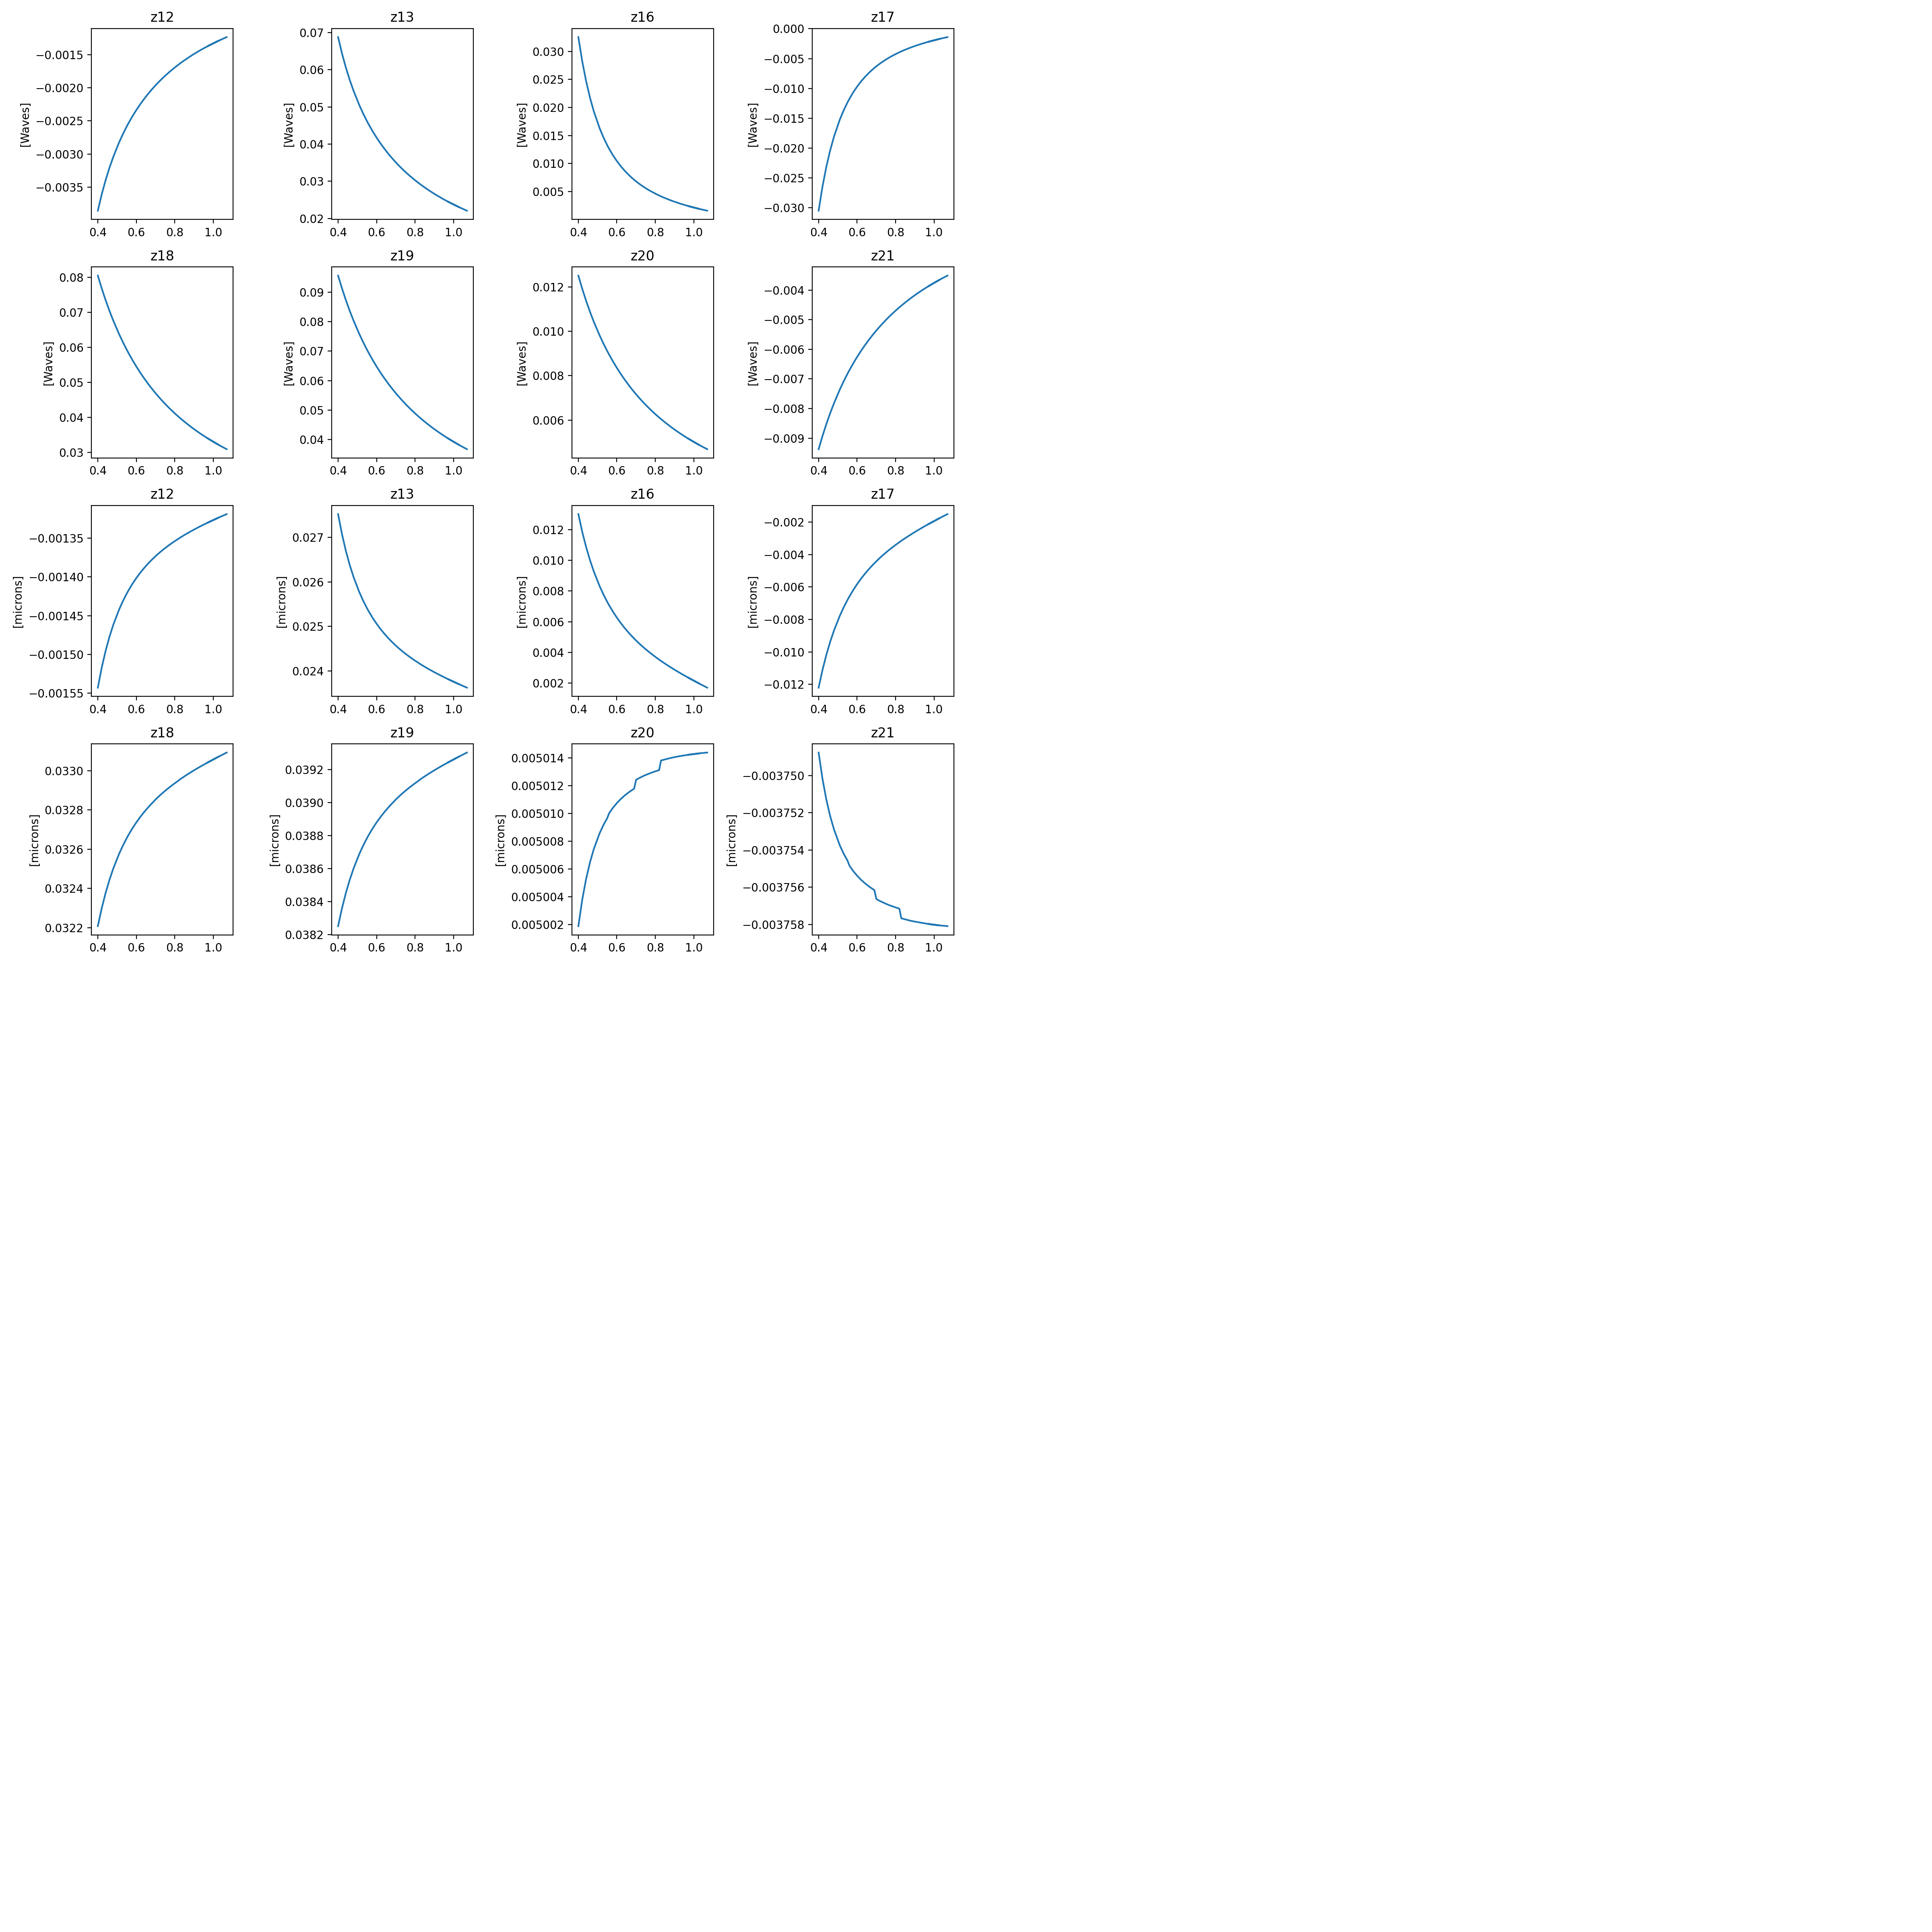

In [13]:
f,ax = plt.subplots(4,4,figsize=(12,12))
axf = ax.flatten()
ii = 0
for i in highorder_terms:
    
    name = "z%d" % (i)
    p = axf[ii].plot(dftt[fn1].wave,dftt[fn1][name])
    axf[ii].set_title(name)
    axf[ii].set_ylabel("[Waves]")
    ii = ii+1
    
for i in highorder_terms:
    
    name = "z%d" % (i)
    p = axf[ii].plot(dftt[fn1].wave,dftt[fn1][name]*dftt[fn1].wave)
    axf[ii].set_title(name)
    axf[ii].set_ylabel("[microns]")
    ii = ii+1
    
plt.tight_layout()

<IPython.core.display.Javascript object>


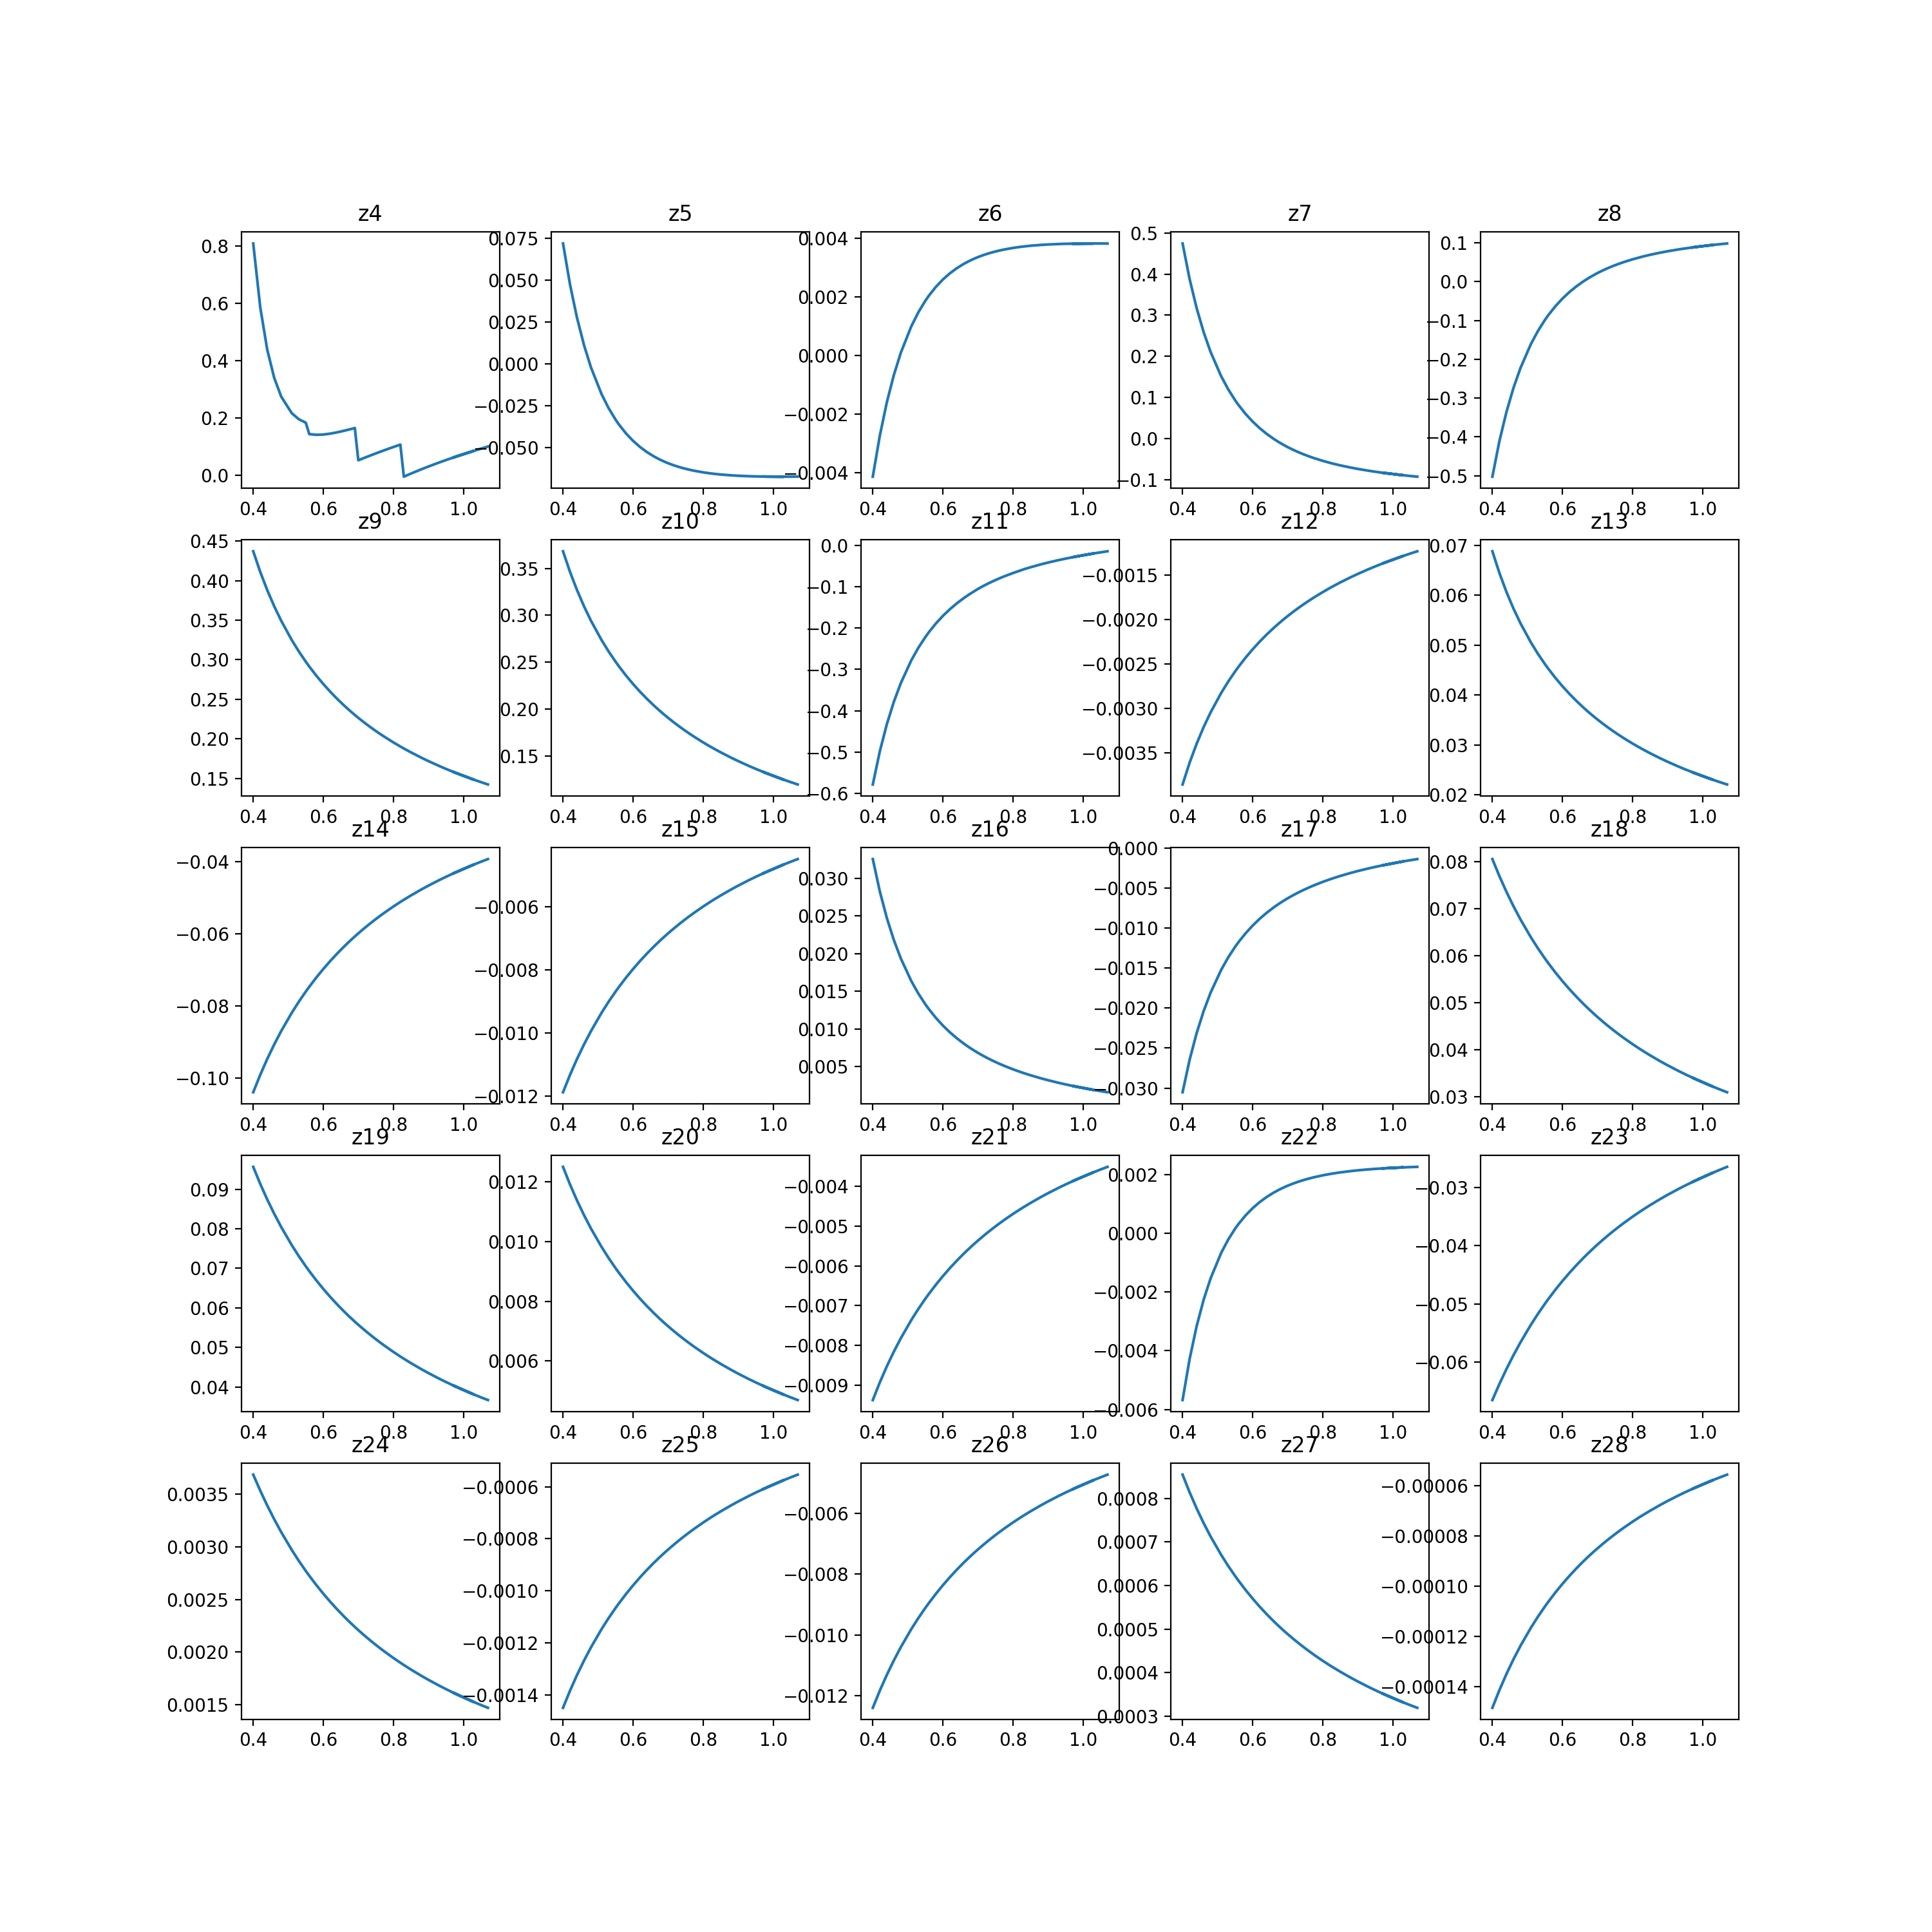

In [14]:
f,ax = plt.subplots(5,5,figsize=(15,15))
axf = ax.flatten()
for i in range(25):
    
    name = "z%d" % (i+4)
    p = axf[i].plot(dftt[fn1].wave,dftt[fn1][name])
    axf[i].set_title(name)

<IPython.core.display.Javascript object>


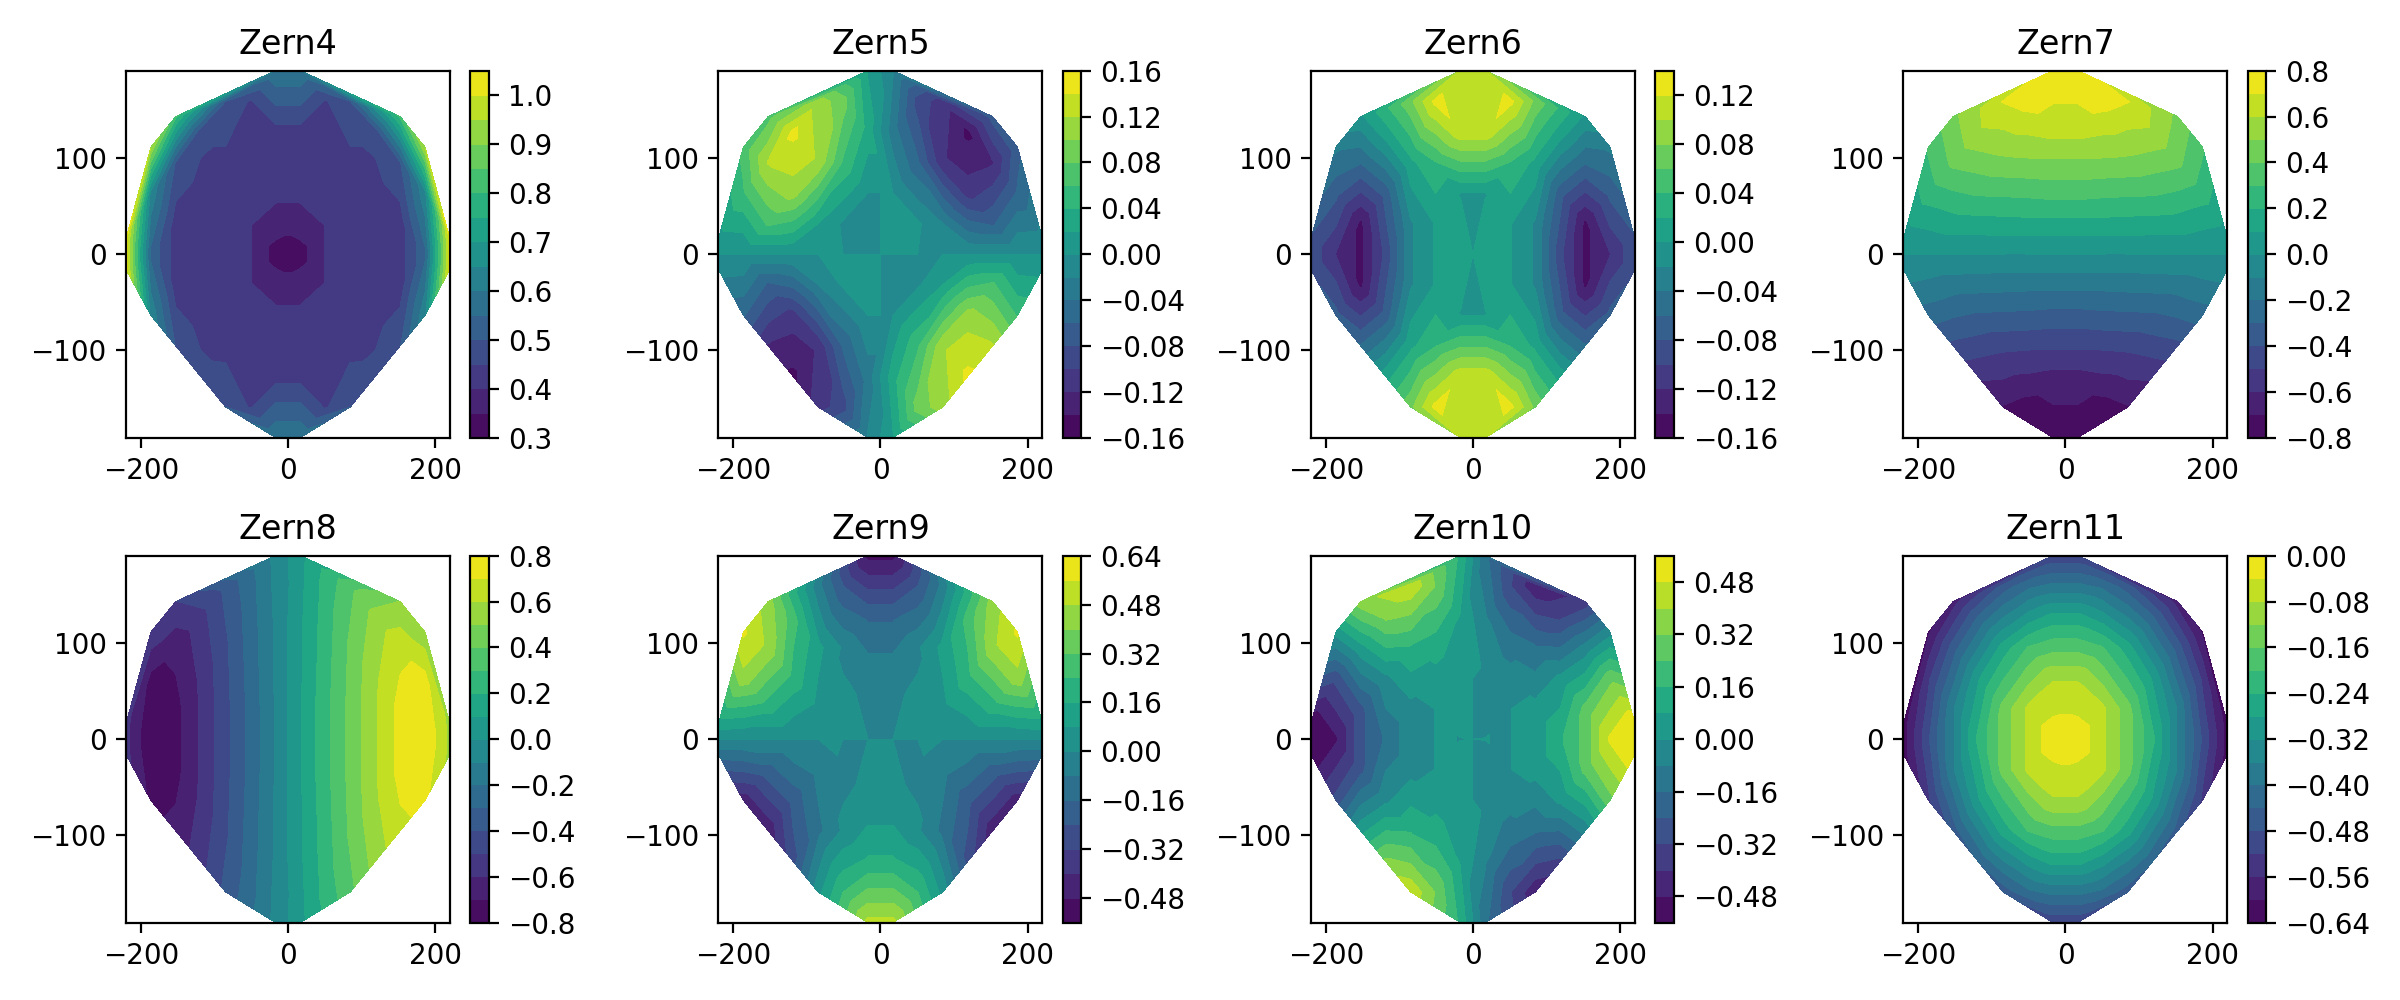

In [15]:
f,ax = plt.subplots(2,4,figsize=(12,5))
axf = ax.flatten()
aplots = []

usewave = (dftt.wave == 0.4)
for iz in range(4,12):
    aplot = axf[iz-4].tricontourf(dftt[usewave].x.values.tolist(), dftt[usewave].y.values.tolist(), dftt[usewave]["z%d" % (iz)].values.tolist(),15)
    f.colorbar(aplot,ax=axf[iz-4])
    axf[iz-4].set_title("Zern%d" % (iz))
    
f.tight_layout()

<IPython.core.display.Javascript object>


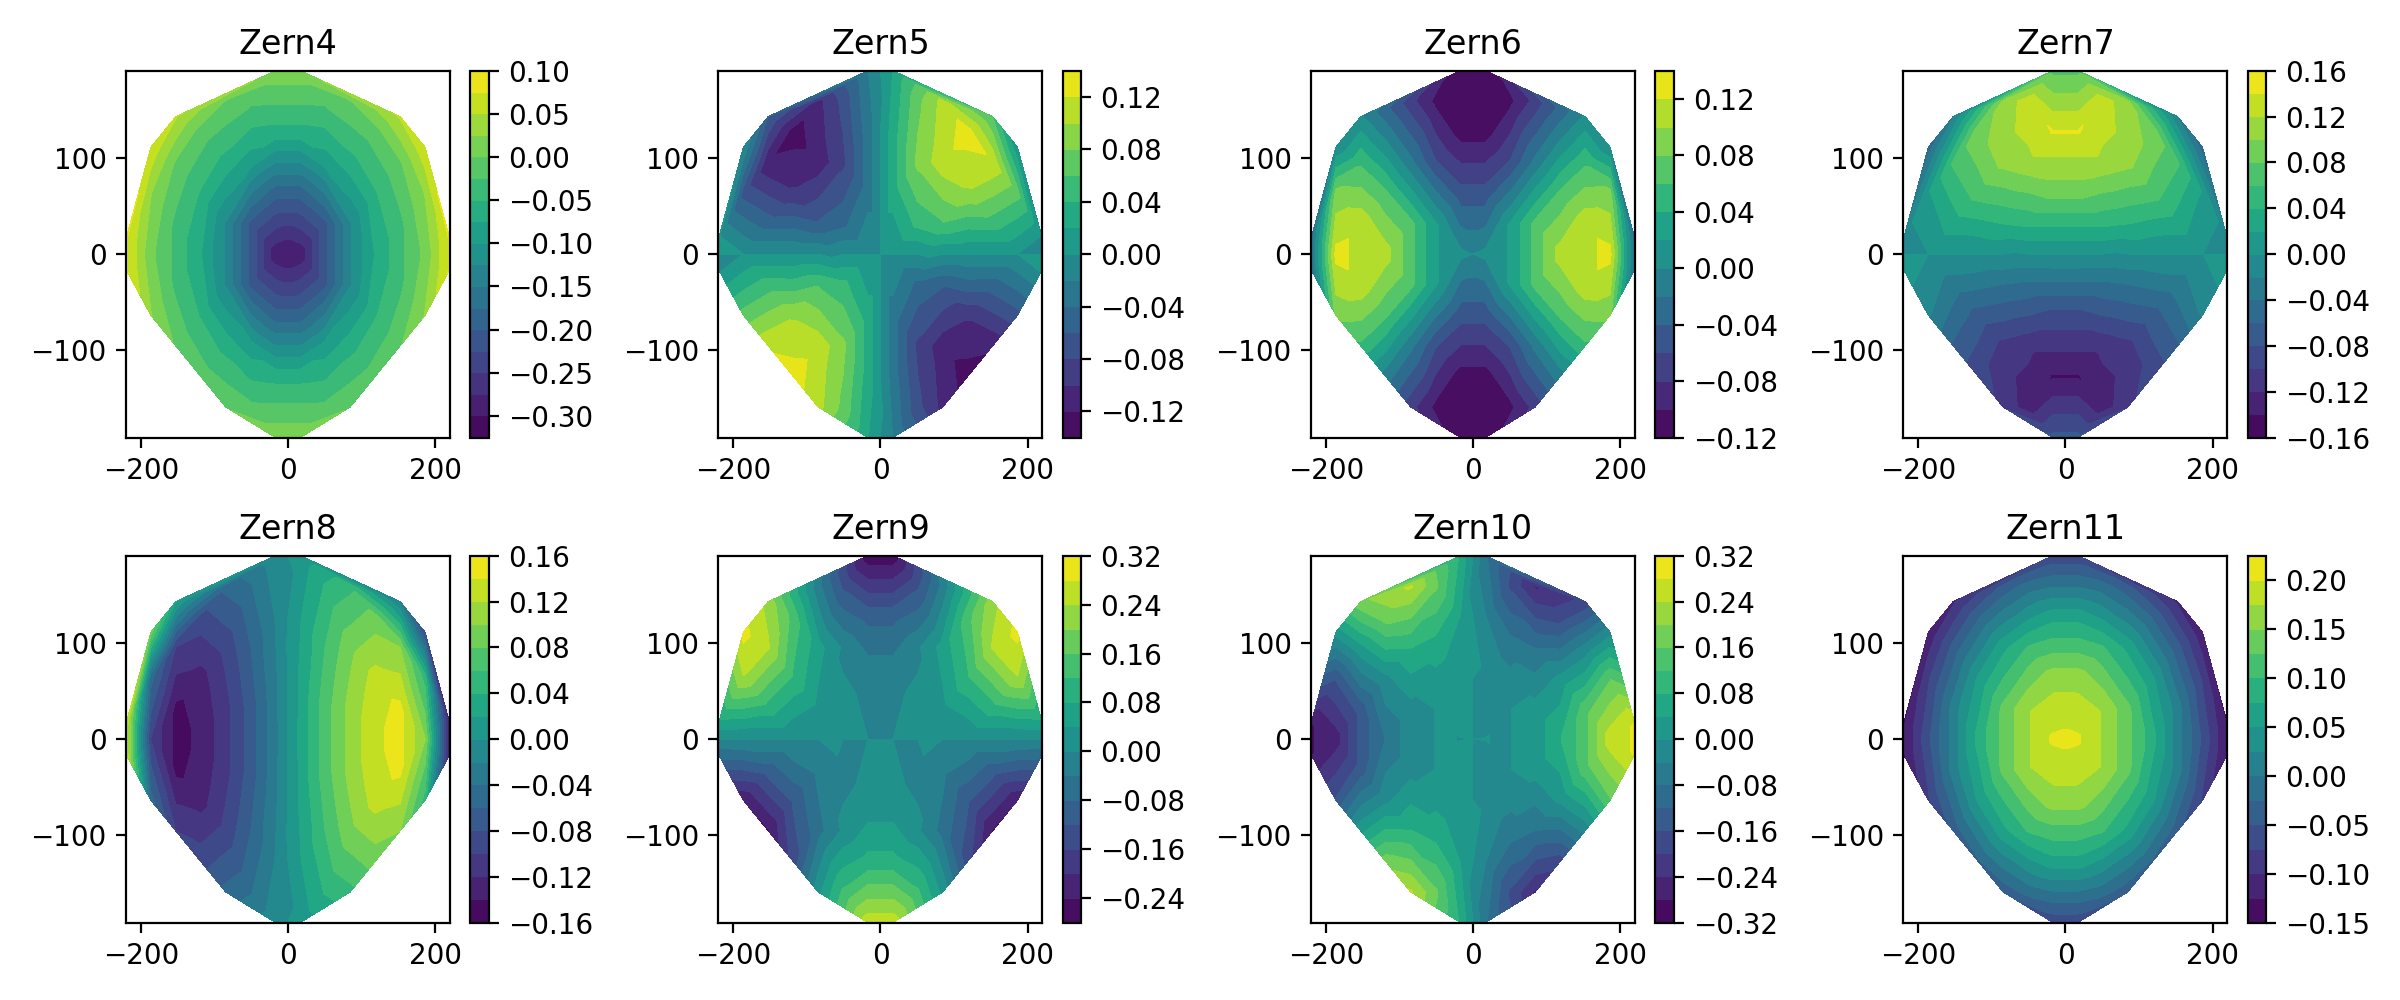

In [16]:
f,ax = plt.subplots(2,4,figsize=(12,5))
axf = ax.flatten()
aplots = []

usewave = (dftt.wave == 0.7)
for iz in range(4,12):
    aplot = axf[iz-4].tricontourf(dftt[usewave].x.values.tolist(), dftt[usewave].y.values.tolist(), dftt[usewave]["z%d" % (iz)].values.tolist(),15)
    f.colorbar(aplot,ax=axf[iz-4])
    axf[iz-4].set_title("Zern%d" % (iz))
    
f.tight_layout()

<IPython.core.display.Javascript object>


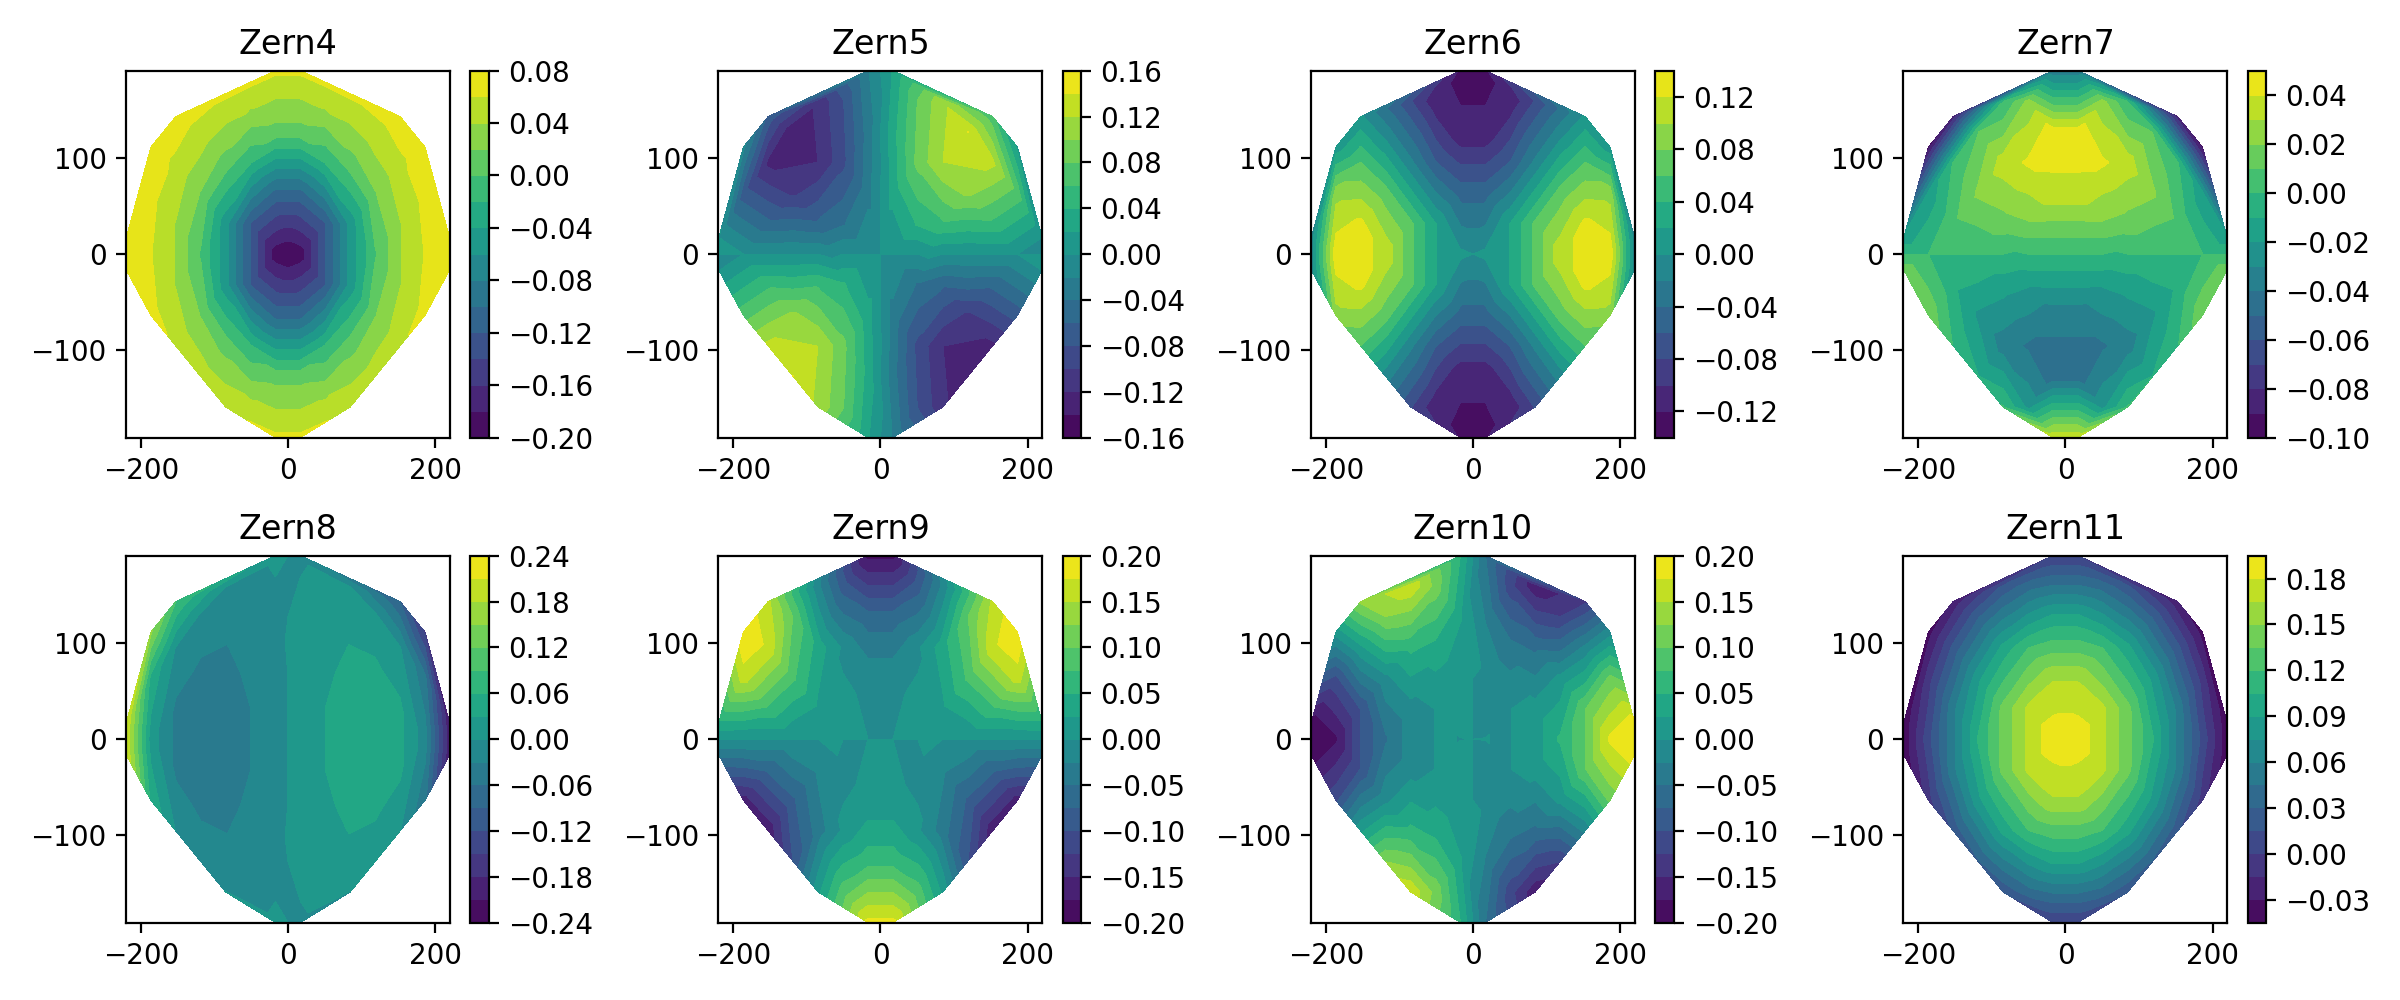

In [17]:
f,ax = plt.subplots(2,4,figsize=(12,5))
axf = ax.flatten()
aplots = []

usewave = (dftt.wave == 0.99)
for iz in range(4,12):
    aplot = axf[iz-4].tricontourf(dftt[usewave].x.values.tolist(), dftt[usewave].y.values.tolist(), dftt[usewave]["z%d" % (iz)].values.tolist(),15)
    f.colorbar(aplot,ax=axf[iz-4])
    axf[iz-4].set_title("Zern%d" % (iz))
    
f.tight_layout()

71
